
$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
$

# Practice
**Finish this excercise and submit on Canvas.**

Q: Write a python code that create two vectors, $\wv$ and $\xv$ as follows: 

$
\xv = \begin{bmatrix}
         4.0 \\
         2.3 \\
         1.2 \\
         5.8
        \end{bmatrix},  
\wv = \begin{bmatrix}
         0.8 \\
         0.1 \\
         0.53 \\
         0.33
        \end{bmatrix}
$

In [18]:
import numpy as np

x= np.array([4.0,2.3,1.2,5.8])
w=np.array([0.8,0.1,0.53,0.33])
print(x,w)

[ 4.   2.3  1.2  5.8] [ 0.8   0.1   0.53  0.33]


Q: Write a function *linear_model(x, w)* that returns the result of dot product.

In [19]:
def linear_model(x, w):
    # fill in here
    return  w @ x

Q: Pass the $\wv$ and $\xv$ and print the output of the linear model.

In [20]:
print(linear_model(x,w))

5.98


# Linear Regression

In this note, we solve regression problems using the linear model as follows. 
For instance, we have example data as follows. 
The goal we want to acheive in this problem is to find a best fit on all the data.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
X = np.linspace(0,10, 101)
T = 2 * X  + 4+ np.random.rand(101) * 5


In [6]:
def data_scatter(k=101):
    plt.plot(T[:k], '.')
    plt.xticks(range(0, 101, 20)[:k], range(0, 11, 2)[:k])

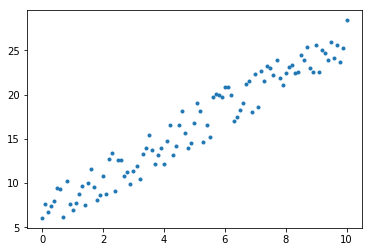

In [7]:
data_scatter()

# Practice

Implement the least squares model and apply to the simulated data X and T. 
Consider using **np.linalg.inv**, **np.linalg.solve**, **np.linalg.lstsq**.
After getting the parameter w, plot the approximation line. 

In [8]:
# TODO: code for finding w

X1 = np.c_[np.ones((101, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X1.T.dot(X1)).dot(X1.T).dot(T)
theta_best

array([ 6.46022511,  1.99696387])

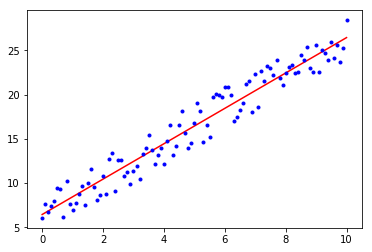

In [9]:
# TODO: Write codes to generate the plot as below. 

X_new = np.array([[0], [10]])
X1_new = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X1_new.dot(theta_best)
X_new,y_predict
plt.plot(X_new, y_predict, "r-")
plt.plot(X, T, "b.")

# Pratice

Implement the LMS for the simulated sample X, and show the plot

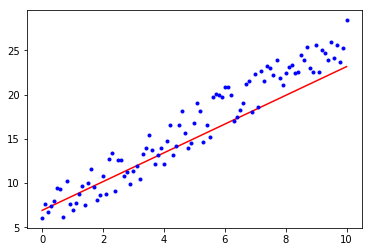

In [10]:
import IPython.display as ipd  # for display and clear_output

# initial weights with random values
w = np.random.rand(X1.shape[1])

# learning rate
alpha = 0.01
N = 101
m = 25
t0, t1 = 5, 50
fig = plt.figure()

def learning_schedule(t):
    return t0 / (t + t1)

# sequential learning
for k in range(N):
    for i in range(m):
        random_index = np.random.randint(m)
        x_val = X1[random_index:random_index+1]
        y_val = T[random_index:random_index+1]
        gradients = 2 * x_val.T.dot(x_val.dot(w) - y_val)
        eta = learning_schedule(k * m + i)
        w = w - eta * gradients
        
X_val_new = np.array([[0],[10]])
X_val_new
X_val_pred = np.c_[np.ones((2,1)),X_val_new]
y_pred = X_val_pred.dot(w)
y_pred

# TODO: Write codes to generate the plot as below. 
plt.plot(X_val_new, y_pred, "r-")
plt.plot(X,T,"b.")
plt.show()